In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df = df.drop('Id',axis=1)

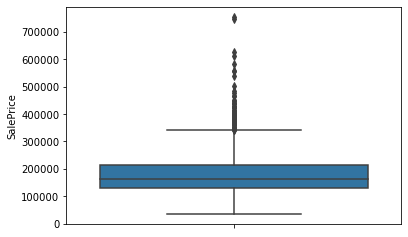

In [5]:
sns.boxplot(y='SalePrice',data=df)

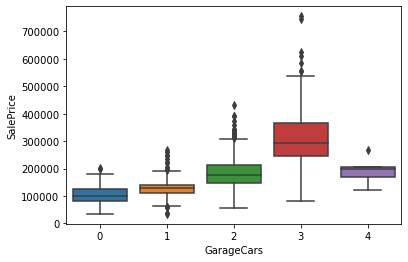

In [6]:
sns.boxplot(y='SalePrice',x='GarageCars',data=df)

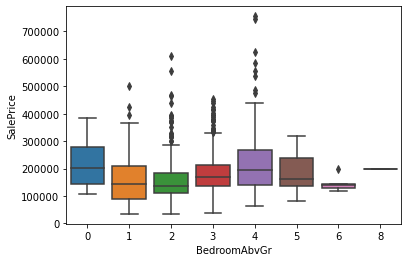

In [7]:
sns.boxplot(y='SalePrice',x='BedroomAbvGr',data=df)

YearRemodAdd YearBuilt

In [8]:
df[(df['YearRemodAdd']<df['YearBuilt'])&df['YearRemodAdd']!=0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [9]:
df.sort_values(by='SalePrice', ascending=False).head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
190,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000
540,20,RL,85.0,14601,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,315000
618,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813


In [10]:
df[df['BedroomAbvGr']==0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
189,120,RL,41.0,4923,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,286000
634,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
1163,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
1213,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1270,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


In [11]:
df = df[(df['BedroomAbvGr']!=0)&(df['BedroomAbvGr']<8)]

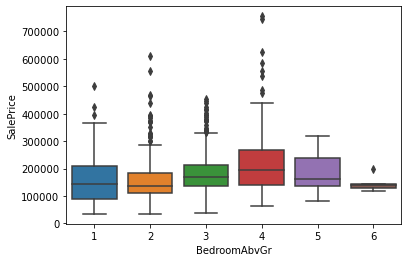

In [12]:
sns.boxplot(y='SalePrice',x='BedroomAbvGr',data=df)

In [13]:
df = df[df['SalePrice']<300000]

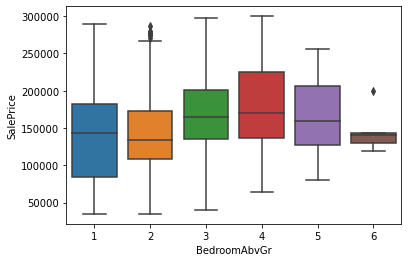

In [14]:
sns.boxplot(y='SalePrice',x='BedroomAbvGr',data=df)

In [15]:
df = df.drop('GarageYrBlt',axis=1)
df = df.drop('TotRmsAbvGrd',axis=1)
df = df.drop('GarageCars',axis=1)
df = df.drop('LotFrontage',axis=1)
df = df.drop('OverallQual',axis=1)
df = df.drop('1stFlrSF',axis=1)

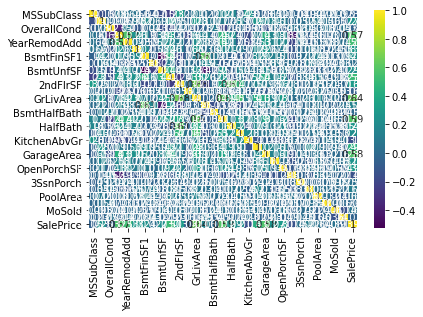

In [16]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [17]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1332.000000,1339.000000,1339.000000,1339.000000,1339.00000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,57.602689,9981.654220,5.598954,1969.059746,1983.306199,83.326577,399.319642,48.505601,556.080657,1003.90590,...,85.325616,43.038835,23.147872,3.250934,14.505601,2.593727,46.970874,6.299477,2007.817774,164127.831964
std,43.160411,7960.249234,1.117746,29.881120,20.734539,152.814789,414.126864,161.305582,425.558770,398.79085,...,118.980636,63.999906,62.425685,28.838913,54.494845,39.135090,517.671666,2.693194,1.327961,52002.456276
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7323.000000,5.000000,1951.000000,1965.000000,0.000000,0.000000,0.000000,216.000000,780.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,50.000000,9187.000000,5.000000,1970.000000,1991.000000,0.000000,354.000000,0.000000,470.000000,953.00000,...,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,156000.000000
75%,70.000000,11203.500000,6.000000,1998.000000,2003.000000,126.250000,662.000000,0.000000,806.000000,1217.00000,...,156.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,195700.000000
max,190.000000,164660.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1127.000000,2042.000000,6110.00000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,299800.000000


In [18]:
dff=df.fillna("None")
for name in dff.columns:
    s=''
    s+=name
    if (type(dff[name][0])==str):
        print(s)  
        le = LabelEncoder()
        le.fit(dff[name])
        dff[name]=le.transform(dff[name])
                        

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [19]:
dff.describe()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,57.602689,3.038835,9981.654220,0.995519,0.992532,1.979089,2.781927,0.000747,3.022405,0.057506,...,2.593727,2.992532,3.472741,1.073936,46.970874,6.299477,2007.817774,7.544436,3.733383,164127.831964
std,43.160411,0.643457,7960.249234,0.066815,0.259247,1.399182,0.708861,0.027328,1.623199,0.263034,...,39.135090,0.122032,1.108385,0.384374,517.671666,2.693194,1.327961,1.573820,1.105705,52002.456276
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,7323.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,128000.000000
50%,50.000000,3.000000,9187.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,156000.000000
75%,70.000000,3.000000,11203.500000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,195700.000000
max,190.000000,4.000000,164660.000000,1.000000,2.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,299800.000000


In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1339 non-null   int64 
 1   MSZoning       1339 non-null   int32 
 2   LotArea        1339 non-null   int64 
 3   Street         1339 non-null   int32 
 4   Alley          1339 non-null   int32 
 5   LotShape       1339 non-null   int32 
 6   LandContour    1339 non-null   int32 
 7   Utilities      1339 non-null   int32 
 8   LotConfig      1339 non-null   int32 
 9   LandSlope      1339 non-null   int32 
 10  Neighborhood   1339 non-null   int32 
 11  Condition1     1339 non-null   int32 
 12  Condition2     1339 non-null   int32 
 13  BldgType       1339 non-null   int32 
 14  HouseStyle     1339 non-null   int32 
 15  OverallCond    1339 non-null   int64 
 16  YearBuilt      1339 non-null   int64 
 17  YearRemodAdd   1339 non-null   int64 
 18  RoofStyle      1339 non-null

In [27]:
#dff['MasVnrArea'].value_counts(dropna=False)
dff = dff.drop('MasVnrArea',axis=1)

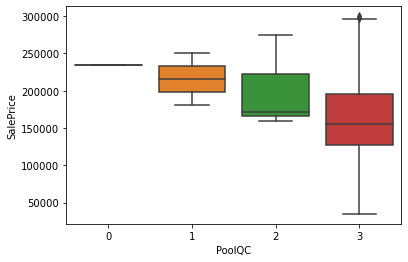

In [28]:
sns.boxplot(y='SalePrice',x='PoolQC',data=dff)

In [29]:
Y = dff['SalePrice']
X = dff.drop('SalePrice',axis=1)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)

In [31]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_LR = LR.predict(X_test)
print('MAE:',round(mean_absolute_error(Y_test,Y_LR),3))
print('MSE:',round(mean_squared_error(Y_test,Y_LR)**(1/2),3))
print('R2:',round(r2_score(Y_test,Y_LR),3))

MAE: 16372.396
MSE: 21524.608
R2: 0.847


In [61]:
DTR = DecisionTreeRegressor(max_depth=8)
DTR.fit(X_train,Y_train)
Y_DTR=DTR.predict(X_test)
print('MAE:',round(mean_absolute_error(Y_test,Y_DTR),3))
print('MSE:',round(mean_squared_error(Y_test,Y_DTR)**(1/2),3))
print('R2:',round(r2_score(Y_test,Y_DTR),3))

MAE: 18745.392
MSE: 24361.954
R2: 0.804


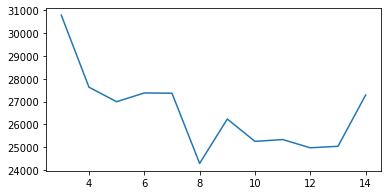

In [59]:
trdepth,score = [],[]
for i in range(3,15):
    DTR = DecisionTreeRegressor(max_depth=i)
    DTR.fit(X_train,Y_train)
    Y_DTR=DTR.predict(X_test)
    trdepth.append(i)
    score.append(mean_squared_error(Y_test,Y_DTR)**(1/2))
plt.rcParams['figure.figsize']=6,3
plt.plot(trdepth,score)

In [62]:
pr_df = pd.read_csv('data/test.csv')
pr_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
